In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Assignments/datasets/admission.csv")

In [2]:
#a Summary Statistics
print(" Minimum values:\n", df.min())
print("\n Maximum values:\n", df.max())
print("\n Mean:\n", df.mean())
print("\n Range:\n", df.max() - df.min())
print("\n Standard Deviation:\n", df.std())
print("\n Variance:\n", df.var())
print("\n Percentiles:\n", df.describe(percentiles=[.25, .5, .75]))

#OR, use df.describe(include="all")

 Minimum values:
 Serial No.             1.00
GRE Score            290.00
TOEFL Score           92.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   6.80
Research               0.00
Chance of Admit        0.34
dtype: float64

 Maximum values:
 Serial No.           500.00
GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
Chance of Admit        0.97
dtype: float64

 Mean:
 Serial No.           250.50000
GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64

 Range:
 Serial No.           499.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP 

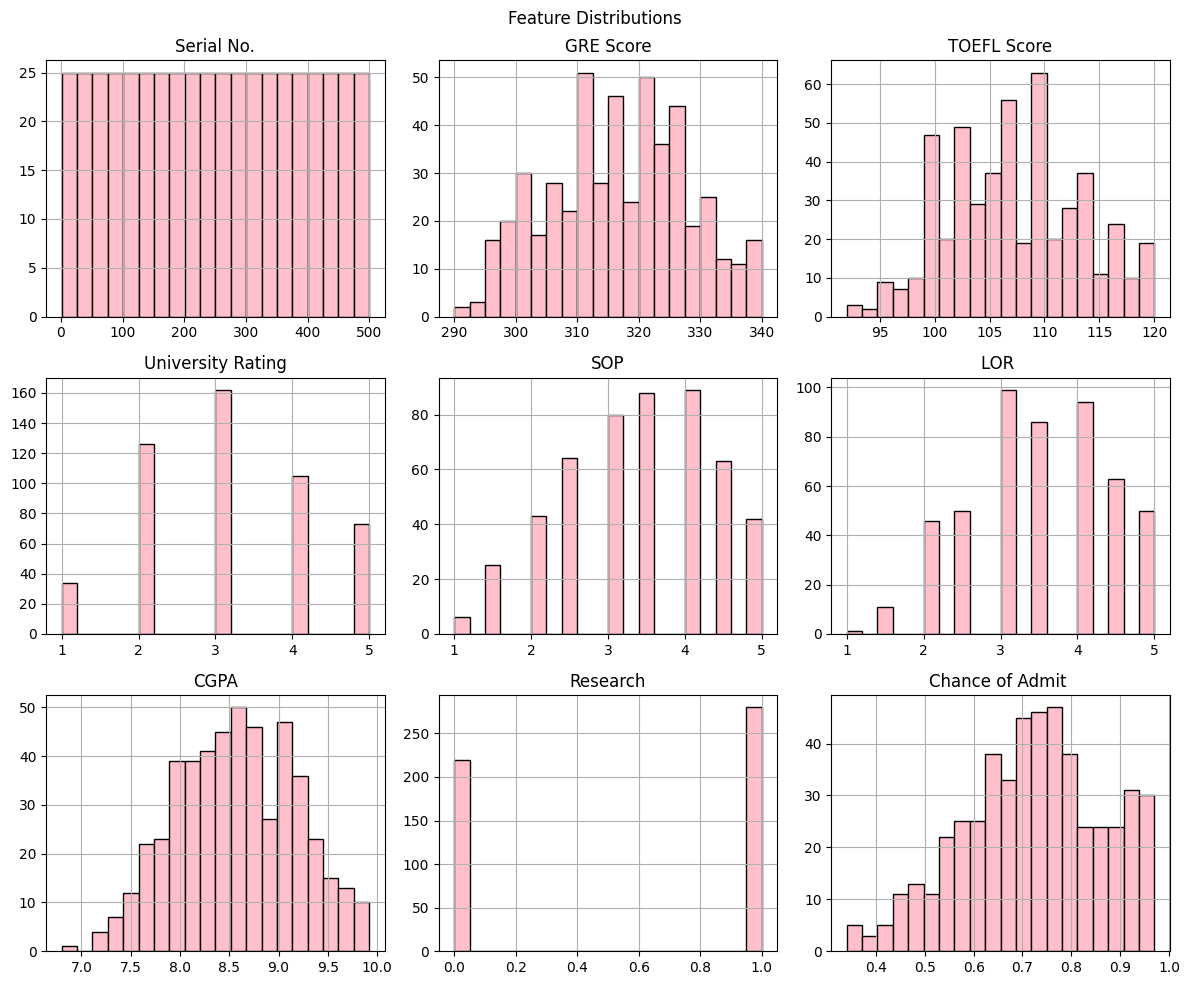

In [5]:
#b Histogram
df.hist(figsize=(12, 10), bins=20, color='pink', edgecolor='black') #or color='skyblue'
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

In [6]:
#c Data Preprocessing

# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [7]:
#c Scaling (Data transformation)

from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=['Serial No.', 'Chance of Admit '])
y = df['Chance of Admit ']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#c Model building
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predict
y_pred = rf.predict(X_test)

In [14]:
# Evaluate
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.004278408300000005
R² Score: 0.7907868801955988
